In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from NeuralNetwork.dense import Dense
from NeuralNetwork.activations import Sigmoid,Softmax
from NeuralNetwork.losses import mse, mse_derive
from NeuralNetwork.network import predict
from tqdm import tqdm
import pickle

In [2]:
EPOCHS = 1
ALPHA = [0.002,0.008,0.03,0.08,0.2]

In [19]:
def k_fold(X,Y,k,set_fold):
    batch = int(len(X)/k)
    start = int(set_fold*batch)
    end = int((set_fold+1)*batch)
    x_val = X[start:end]
    y_val = Y[start:end]
    x_train = np.concatenate((X[:start],X[end:]))
    y_train = np.concatenate((Y[:start],Y[end:]))
    return x_train,y_train,x_val,y_val

In [20]:
def train(NN, loss, loss_derive, X, Y,epoch, alpha,k = 10, verbose = True):
    error_TS = []
    acc_TS = []
    val_error_TS = []
    val_acc_TS = []
    for e in range(epoch):
        errors= 0
        acc =0
        val_error = 0
        val_acc = 0
        set_fold = e%k
        x_train,y_train,x_val,y_val = k_fold(X,Y,k,set_fold)
        for x, y in zip(x_train, y_train):
            # forward
            out = predict(NN, x)
            if np.argmax(y)==np.argmax(out):
                acc+=1
            # error

            errors+= loss(y, out)

            # backward
            gradient = loss_derive(y, out)
            for layer in reversed(NN):
                gradient = layer.backward(gradient, alpha)

        for x, y in zip(x_val, y_val):
            output = predict(NN, x)
            if np.argmax(y)==np.argmax(output):
                val_acc+=1
            val_error += loss(y, output)
        
        errors/= len(x_train)
        acc /=len(x_train)
        val_error /= len(x_val)
        val_acc /=len(x_val)

        if verbose:
            print(f"{e + 1}/{epoch}, error={round(errors,4)}, accuracy={round(acc,4)}, val_error={round(val_error,4)}, val_accuracy={round(val_acc,4)}")
        error_TS.append(errors)
        acc_TS.append(acc)
        val_error_TS.append(val_error)
        val_acc_TS.append(val_acc)
    return [error_TS,acc_TS,val_error_TS,val_acc_TS]

In [21]:
def testModel(NN, loss,x_test,y_test):
    test_error = 0
    test_acc = 0
    for x, y in zip(x_test, y_test):
        output = predict(NN, x)
        if np.argmax(y)==np.argmax(output):
            test_acc+=1
        test_error += loss(y, output)
    return test_error/len(x_test),test_acc/len(x_test)

In [22]:
df_train = pd.read_csv("./dataset/MNIST.csv")

In [23]:
Y_test,X_test =  df_train.iloc[:2000, :1], df_train.iloc[:2000, 1:]
Y_train,X_train = df_train.iloc[2000:, :1], df_train.iloc[2000:, 1:]
X_in = np.reshape(X_train,X_train.shape +(1,))
Y_in = np.squeeze(np.eye(10)[Y_train])
Y_in = np.reshape(Y_in,Y_in.shape +(1,))
X_test = np.reshape(X_test,X_test.shape +(1,))
Y_test = np.squeeze(np.eye(10)[Y_test])
Y_test = np.reshape(Y_test,Y_test.shape +(1,))

In [24]:
export = {}

In [26]:
for alpha in ALPHA:
    NN = [Dense(784,200),
        Sigmoid(),
        Dense(200,40),
        Sigmoid(),
        Dense(40,10),
        Softmax()
        ]
    metrics = train(NN, mse, mse_derive, X=X_in,Y=Y_in, epoch=EPOCHS, alpha=alpha,k=10)
    export[str(alpha)] = metrics
    metrics_names = ['Training Loss','Training Accuracy','Test Loss','Test Accuracy']
    for i in range(len(metrics_names)):
        plt.plot(metrics[i])
        plt.xlabel("Epochs")
        plt.ylabel(metrics_names[i])
        plt.savefig("./graph/MNIST_{}.png".format(metrics_names[i]))
        plt.clf()
    

e:\GITHUB\MERE_WALE\ELL784\Assignment2\NeuralNetwork\activations.py:6: RuntimeWarning: overflow encountered in exp
  sig = 1 + np.exp(-z)


1/1, error=0.131, accuracy=0.1054, val_error=0.1256, val_accuracy=0.1192


KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [ ]:
pickle.dumps(export)

0.04300479344668219

In [ ]:
test_error, test_acc = testModel(NN,mse,X_test,Y_test)
print(test_acc,test_acc)

In [27]:
with open("Export",'rb') as f:
    graph = pickle.load(f)

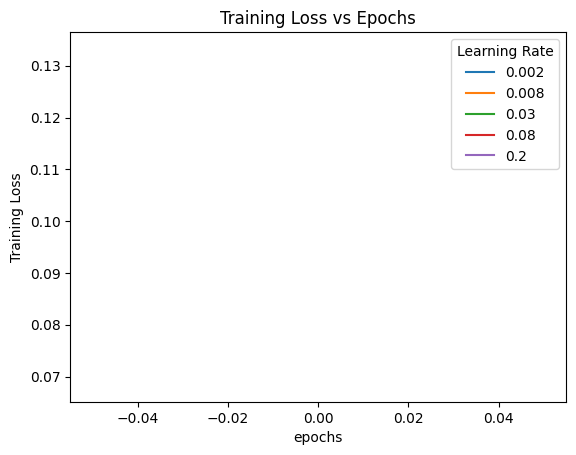

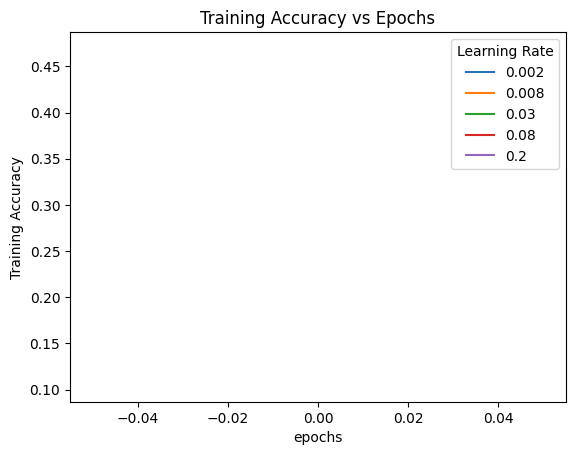

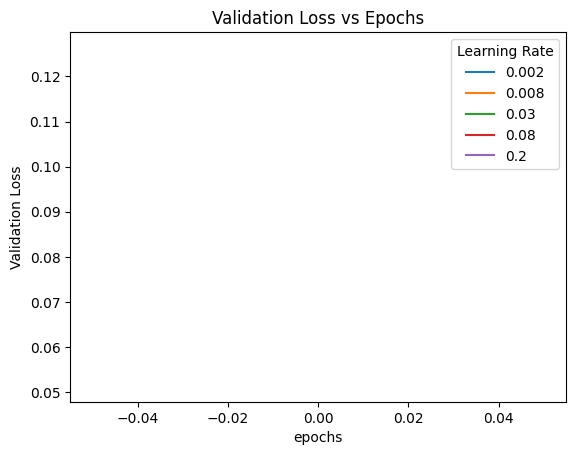

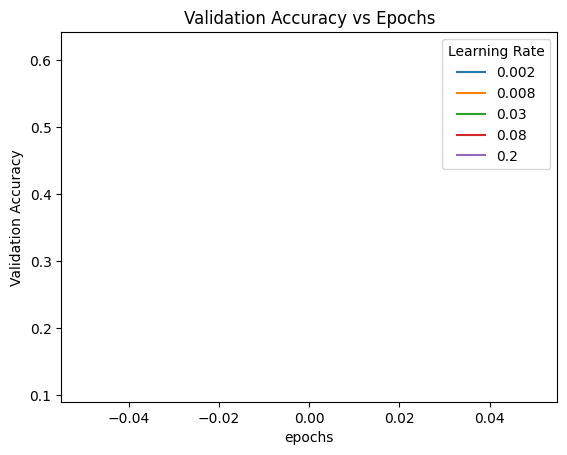

In [12]:
Titles = ["Training Loss","Training Accuracy","Validation Loss","Validation Accuracy"]
for i in range(len(Titles)):
    for a in ALPHA:
        plt.plot(graph[str(a)][i])
    plt.xlabel("epochs")
    plt.ylabel(Titles[i])
    plt.legend(ALPHA,title="Learning Rate")
    plt.title(Titles[i]+" vs Epochs")
    plt.savefig("./graph/{}".format(Titles[i]))
    plt.show()

In [5]:
Titles = ["Test Loss","Test Accuracy"]
for i in range(4,6):
    heights  = []
    for a in ALPHA:
        heights.append(graph[str(a)][i])
    plt.plot(ALPHA,heights)
    plt.xlabel("Learning Rate")
    plt.ylabel(Titles[i-4])
    plt.savefig("./graph/BAR_{}_{}.png".format(i,a))
    plt.clf()



<Figure size 640x480 with 0 Axes>

In [61]:
graph[str(ALPHA[0])][5]

0.687

In [10]:
graph[str(ALPHA[1])]

[[0.10711418200439544],
 [0.206],
 [0.09704059690036315],
 [0.2665],
 0.09471587368648966,
 0.2845]

In [73]:
Test_loss = [0.075,
0.0669,
0.0587,
0.054,
0.0441,
0.0380,
0.0293,
0.02396,
0.0172,
0.010,
]
Test_Accuracy = [0.952,
0.882,
0.767,
0.7055,
0.574,
0.496,
0.378,
0.305,
0.213,
0.1245,
]
Train_Accuracy = [0.8127,
0.8756,
0.900,
0.9226,
0.925,
0.94,
0.9464,
0.955,
0.9571,
0.9598,
]

In [78]:
Test_Accuracy = list(reversed(Test_Accuracy))

[0.1245, 0.213, 0.305, 0.378, 0.496, 0.574, 0.7055, 0.767, 0.882, 0.952]

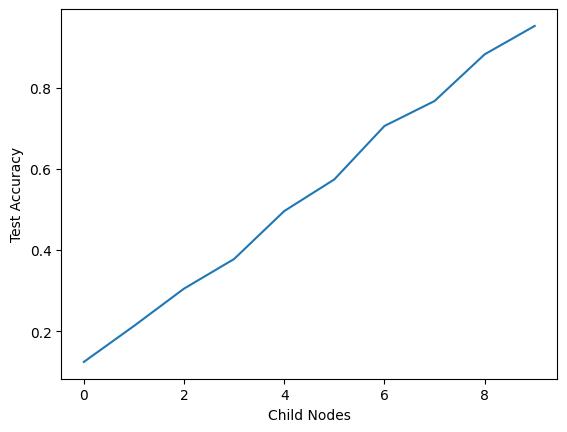

In [79]:
plt.plot(Test_Accuracy)
plt.xlabel("Child Nodes")
plt.ylabel("Test Accuracy")
plt.savefig("./graph/TRee_test_acc")
plt.show()
